# Linear and Multiple Regression

In the introductory course, we learned how to use linear regression to predict some output from a set of inputs. We did this by splitting the data into training and testing sets, training a linear regression model on the training data, and predicting the outputs on the testing data. 

In this module, our aim is to better understand what makes linear regression tick? We'll begin with simple linear regression and make our way to multiple regression, and, in the next notebook, we get our feet wet with logistic regression.

### Simple Linear Regression 
In simple linear regression, we want to predict the values of one variable from the values of another. These are often denoted as `x` and `y`, where `x` is the variable that predicts `y`. These are also referred to as the independent (`x`) and dependent (`y`) variable. For example, it is probably reasonable to assume that the amount of time that an individual spends studying affects the grade that individual obtains on an exam. In this case, the variable, "exam grade" is **dependent** on the variable, "time spent studying".

  - `x = study time` 
  - `y = score on a test`


Now imagine we have some data that evaluates these two variables. Using the given information about how x and y are related, we can then create a linear model to predict future values of y for any particular values of x. In other words, we want to estimate y based on x. 


We can represent simple linear regression line with the following equation, $y = \beta_0 + \beta_{1}x$, where $y$ is a point we are predicting given the estimated intercept ($\beta_0$) and slope ($\beta_1$) at a given point $x$. Following our example, given the amount of time someone studies ($x$), what would their expected grade on their exam ($y$) be. But how do we find the line regression line that best approximates the linear relationship. Well, minimize the squared errors. In other words, we create a line that minimizes the squared distance from each point to the residual line.

We can make three simple assumptions for simple linear regression model. 

   Given our linear equation, $y^i = β_0 + β_1.{x_1}^i + \epsilon^i$,$ i = 1, 2, . . . ,n $
    
i) We assume that the relationship between x and y is linear

ii) There is an error associated with each $y_i$

iii) We lastly assume that the errors($\epsilon$) are independent and identically normally distributed with mean 0 and variance $\sigma^2$

We have data for x and y for observation i in the dataset. Using above equation we make prediction $\beta_0 + \beta_1.x_i$. Since the coefficients $\beta_0$ and $\beta_1$ have to be same for all observations we often make some error which we call $\epsilon_i$(epsilon). These error terms are also called residuals. The error will be zero if all the points lie perfectly on a straight line, which rarely happens. So every model has some error. The best model is the one with coefficients that has small error terms. 


student | study time | test score
--------|------------|-----------
$i$     | $x_i$      | $y_i$
$i + 1$ | $x_{i+1}$    | $y_{i+1}$
$...$   | $...$      | $...$
$n$ | $x_{n}$    | $y_{n}$

The above table is just an illustration of the mathematical notation presented above in tabular format using the example of student study time and student test grades.

Understand residuals of data using cars dataset in datasets package.  

**Speed and stopping distance of cars:** The cars dataset in datasets package has two variables: speed and dist. Take a quick look at some of the values in the data frame:

In [43]:
library(datasets)
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


The speed represents how fast the car was going (x) in miles per hour and dist (y) measures how far it took the car to stop, in feet.


Call:
lm(formula = cars$dist ~ cars$speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
cars$speed    3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


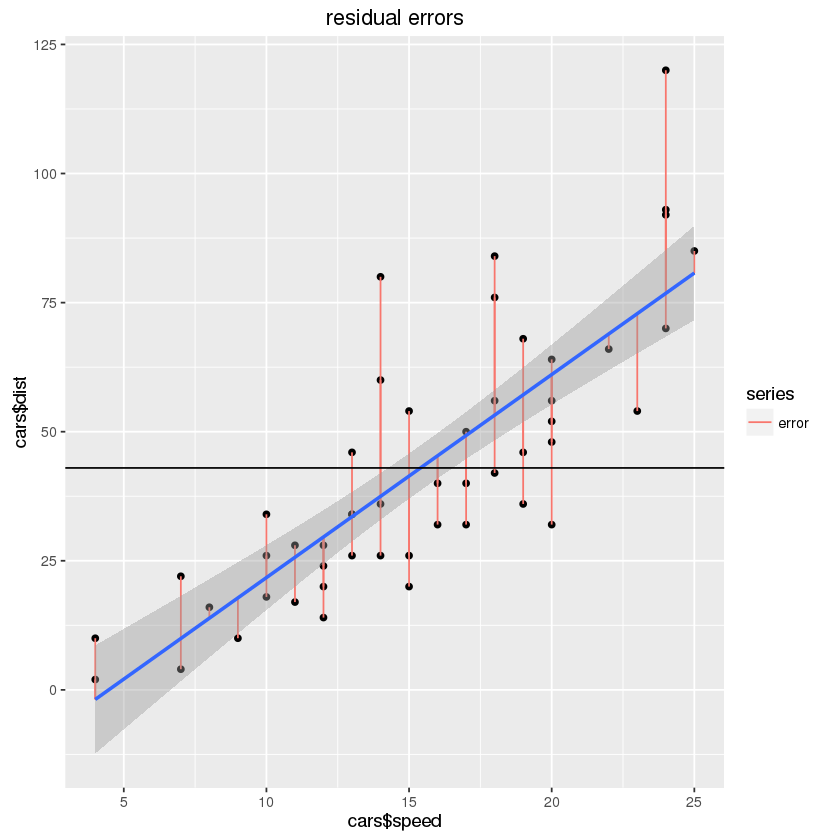

In [44]:
#A simple linear regression model
reg <- lm(cars$dist ~ cars$speed)

library(ggplot2)

# The predicted values for dependent variable 'dist' can be accessed by referring to fitted.values of the model as shown below.
pred_values<-reg$fitted.values

# Calculate the error terms, i'e difference between each point and the regression line. 
diff <- cars$dist-pred_values     

# Display the summary of the model
summary(reg)

#plot the regression line and residual errors
qplot(x=cars$speed, y=cars$dist)+
        geom_line(y=pred_values)+ # Draw regression line with predicted values
        geom_segment(aes(x=cars$speed, xend=cars$speed, y=cars$dist, yend=pred_values, color="error"))+ # Draw residuals, lines 
                                                                    # from each point to the regression line.
        geom_smooth(method=lm,level = 0.95)+ # Add linear regression line, by default includes 95% confidence region
        geom_hline(aes(yintercept=mean(cars$dist)))+ # baseline model. line drawn at mean(dist).
       labs(title="residual errors", color="series")

How do we know how good is our model. A call to `summary()` on the model we have fit will have the metrics measuring the quality of the model.

### Observations from the model `reg`

* **Residuals:** You saw what residuals are from the linear model we fit on car speed and dist variables, the difference between the actual values of the dependent variable(dist) and predicted values from our regression `pred_values`. In our model, the lowest difference is `-29.07` and highest being 43.2. 


* **Significance stars: ** The stars indicate significance level. The number of asterisks displayed are according to the p-value calculated for that variable. A variable is significant if its p value is less than 0.05 as you learned in module 2. **** *** for high significance  and * for low significance**. In our model, speed has three stars indicating a strong relationship  between speed and dist variables.


* **Estimated Coeffecient:** The estimated coefficient is the value of slope calculated by the regression. It gives the slope of the line.


* **Standard Error of the Coefficient Estimate: ** Its the measure of the variability in the estimate for the coefficient. Lower this value better it is and its value is relative to value of the coefficient. As a rule of thumb, it is suggested to have this value at least an order of magnitude less than the coefficient estimate. In our model, the std error of the parent variable is 0.4155 against 3.9324 which is the estimate of the coefficient. So its significant.


* **t-value of the Coefficient Estimate: ** Score that measures whether or not the coefficient for this variable is meaningful for the model. WE normally use p-value or stars(*) to test the variable significance.


* **Variable p-value: ** As explained above, this value should be as small as possible. 


* **Residual Std Error / Degrees of Freedom: ** The Residual Std Error is just the standard deviation of your residuals. For a normal distribution, the 1st and 3rd quantiles should be 1.5 +/- the std error. In our model, the first quantile Q1(-9.525) is little over 1.5 standard deviations away from the standard error 15.38.


* **R-squared: ** Its the metric to measure the goodness of fit of the model. Higher the value the better the model is with 1 being the highest. For our model, it is 0.6511 is a good one.

<img src='../images/residuals.JPG'>

A simple scatterplot of the data is shown above. We have drawn two regression lines. The black line corresponds to regression line drawn using average distance a car took to stop. Its the baseline model which gives largest residuals i'e differences between each point with the black line. The baseline model has an intercept of 43.

The blue line corresponds to regression line drawn using the model "dist ~ speed". If you take point A on the plot its actual `y` value is some where around 82. But using our model we predict its value as somewhere around 36. So the residual for point A is -46 which is calculated as '$actual value - predicted value$'. The linear regression model we fit has an intercept value of -17.5. 

### Sum of the Squared Errors

One of the measures for quality of this regression line is Sum of the Squared Errors (**SSE**) which is the sum of all the squared residuals or error terms. 

Lets assume we have $n$ data points in our data. Then **SSE** is calculated as, 

$$SSE = {(\epsilon_1)^2 + (\epsilon_2)^2+......+ (\epsilon_n)^2}$$

In other words, $\epsilon_1$ is the residual of the first observation, $\epsilon_2$ is the residual of the second observation, and $\epsilon_n$ is the residual of the $n^{th}$ observation where $n$ is the number of observation in the data set.

The line which gives the minimal sum of all this residuals is the best fit line.

### Other error measures

SSE can be difficult to interpret for two reasons.

    a) Depends on the number of data points. If you repeat an experiment with twice as much amount of data the new SSE might be twice as big. The increase doesn't mean its a bad model. 
    
    b) Sum of Squared Errors is in squared units of dependent variable. 
    
To avoid above issues Root Mean Squared Error(**RMSE**) is often used. 

#### Root Mean Squared Error

RMSE divides SSE by N and takes the square root of the result. So it is normalized by `N` and is in the same units as dependent variable. 

$$RMSE = {\sqrt{\dfrac{SSE}{N}}}$$

#### R-Squared 
Another common error measure for Linear Regression is $R^2$. The $R^2$ is a better choice because it compares the best model with the base line model. The baseline model is the one which doesn't use any variables. The red line above is the baseline model. It is the simple average of `y` values. Baseline model predicts the average value of dependent variable regardless of the value of independent variable `x`.  

The Sum of Squared Errors for baseline is called Total Sum of Squares(**SST**). Lets calculate the SSE of the our model and SST for baseline model. 

Using the above values for SSE and SST we can calculate $R^2$ value for the model. It is given as $R^2 = 1- {\dfrac{SSE}{SST}}$

                11353
        =  1 - -------
                32538
                
        =  0.65108
        
Compare this result with the summary of the model below. The $R^2$ values should match.

### Partitioning the sum of squares

When regression is applied on a variable, it divides the variation in dependent variable Y into two parts: the variation of the predicted scores(Y') and the variation of the errors of prediction. The variation of Y (SSY) is the sum of the squared deviations of Y from the mean of Y. In the population, the formula is

SSY = $\sum (Y-\mu_{y})^2 $

where $\mu_y$ is the mean of Y. 


In above model, the mean of Y(dist) is 42.98 and SSY is 32538.98. SSY is calculated in below cells.

SSY can be partitioned into two parts: the sum of squares predicted (SSY_pred) and the sum of squares error (SSE). The sum of squares predicted(SSY_pred) is the sum of the squared deviations of the predicted scores subtracted from the mean predicted score. In above model, it is 21185.4589489051 as calculated below(SSY_pred). The sum of squared error(SSE) is 11353.5210510949 as calculated below. This can be summed up as:

$$SSY = SSY\_pred + SSE$$


In [45]:
# You can find the residuals of the regression model by referring to residuals term of the model as shown below.
SSE = sum(reg$residuals^2)

# SSE is the sum of squares of all residuals which is calculated below
SSE

[1] 11353.52

In [46]:
# Mean value of dist variable
mean_dist <- sum(cars$dist) / nrow(cars)

# Calculating squares of difference between dist values and mean value of dist.  
squares <- apply(cars, 1, function(row) { # apply() applies the defined function for each row. 
                                          # row contains a row data in cars data.
    y <- row[2]   # row[2] gives second element in row i'e dist variable here.
  (y - mean_dist)^2 # Squares of difference between dist and its mean is taken
})

SSY <- sum(squares) # Sum of squares calculated above will give SSY. Total variation in Y, in this case dist variable. 
SSY

[1] 32538.98

In [47]:
# Calculating squares of difference between predicted values of dist variable and mean value of predictions.  

# Capture the predicted dist values from the regression model 'reg' result.
dist_pred_values=as.vector(fitted(reg))

# Create an array of size equal to number of predicted values
dist_pred_residuals <- array(0,dim=length(dist_pred_values))

# Calculate the mean of predicted values
dist_pred_mean = mean(dist_pred_values)

# Iterate through number of predicted values, to calculate the difference between each predicted value and the mean of 
for(i in 1:length(dist_pred_values))    # predicted values
    {
    dist_pred_residuals[i]=dist_pred_mean-dist_pred_values[i]
}

# Sum of squares of difference between dist and its mean is taken
SSY_pred = sum(dist_pred_residuals^2) 
SSY_pred

# SSY = SSY_pred + SSE should hold true as shown below.
paste("SSY", SSY)
paste("SSY_pred + SSE : ",SSY_pred + SSE)

[1] 21185.46

[1] "SSY 32538.98"

[1] "SSY_pred + SSE :  32538.98"

The SSY is the total variation, the SSY_pred is the variation explained, and the SSE is the variation unexplained. Therefore, the proportion of variation explained can be computed as:

$$Proportion\ explained = \frac{SSY\_pred}{SSY}$$

Similarly, the proportion not explained is:

$$Proportion\ not\ explained = \frac{SSE}{SSY}$$

There is an important relationship between the proportion of variation explained and Pearson's correlation: $R^2$ is the proportion of variation explained. Therefore, if r = 1, then, naturally, the proportion of variation explained is 1; if r = 0, then the proportion explained is 0.


$R^2$ is a better choice of error measure because it captures the value added from using a linear regression model over just predicting the average outcome for every data point. 

In $R^2 = 1- {\dfrac{SSE}{SSY}}$,

$0 \leq SSE \leq SSY$ and $0 \leq SSY$ 

Because **SSE** and **SSY** are sums they cannot be less than 0. Linear regression model will never be worse than baseline model because if we replace the independent variable coefficient with 0 we will get baseline model. So in worst case **SSE** will be equal to **SSY** and the $R^2$ will be 0. This means no improvement over baseline model. In best case our model makes no errors and the **SSE** is equal to 0. So the $R^2$ is equal to 1. When $R^2$ is 1 it means a perfect or almost perfect predictive model.

$R^2$ is better because it is unitless and universally interpretable. It is still sometimes hard to interpret $R^2$ because,

i) Good models for easy problems will have $R^2$ equal to 1

ii) Good models for hard problems will have $R^2$ equal to 0

### Standard Error of the Estimate

The standard error of the estimate is a measure of the accuracy of predictions. We know regression line is the line that minimizes the sum of squared deviations of prediction (also called the sum of squares error). The standard error of the estimate is closely related to this quantity and is defined as below:

$\sigma_{est}$ = $\sqrt{\frac{\sum(Y-Y')^2}{N}}$

where σest is the standard error of the estimate, Y is an actual score, Y' is a predicted score, and N is the number of pairs of scores. The numerator is the sum of squared differences between the actual scores and the predicted scores.

In [48]:
# Predicted values of dist using 'reg' regression model.
pred_values=as.vector(fitted(reg))

# Mean of the predicted values.
dist_pred_mean = mean(fitted(reg))

# Calculate the differences between predicted dist values and the mean of predicted values.
for(i in 1:length(pred_values))
    {
    pred_values[i]=dist_pred_mean-pred_values[i]
}

# # Sum of squares of difference between dist and its mean is taken
pred_values_squares_sum = sum(pred_values^2)

# Calculate Standard error of the estimate based on above formula.
standard_error_estimate = sqrt(pred_values_squares_sum/(nrow(cars))) 
paste("standard error of the estimate", standard_error_estimate)

[1] "standard error of the estimate 20.5841973119697"

----
Lets work with wine price dataset to apply simple linear regression on it. 

In [49]:
wine_data <- read.csv('../../../datasets/wine price/wine.csv')
head(wine_data)

Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
1952,7.4950,600,17.1167,160,31,43183.57
1953,8.0393,690,16.7333,80,30,43495.03
1955,7.6858,502,17.1500,130,28,44217.86
1957,6.9845,420,16.1333,110,26,45152.25
1958,6.7772,582,16.4167,187,25,45653.81
1959,8.0757,485,17.4833,187,24,46128.64


In [50]:
AGST_reg = lm(Price ~ AGST, data=wine_data)
summary(AGST_reg)


Call:
lm(formula = Price ~ AGST, data = wine_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78450 -0.23882 -0.03727  0.38992  0.90318 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.4178     2.4935  -1.371 0.183710    
AGST          0.6351     0.1509   4.208 0.000335 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4993 on 23 degrees of freedom
Multiple R-squared:  0.435,	Adjusted R-squared:  0.4105 
F-statistic: 17.71 on 1 and 23 DF,  p-value: 0.000335


According to the P-value(0.000335) which is very close to 0 and the $R^2$ value of 0.435 tells us AGST is a good predictor of Price. Lets fit the model using WinterRain as the predictor.

In [51]:
WinterRain_reg = lm(Price ~ WinterRain, data=wine_data)
summary(WinterRain_reg)


Call:
lm(formula = Price ~ WinterRain, data = wine_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95345 -0.65439  0.04175  0.43132  1.27550 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.6605736  0.6286187  10.596 2.54e-10 ***
WinterRain  0.0006718  0.0010155   0.662    0.515    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6581 on 23 degrees of freedom
Multiple R-squared:  0.01867,	Adjusted R-squared:  -0.02399 
F-statistic: 0.4377 on 1 and 23 DF,  p-value: 0.5148


The P-value(0.515) is way over the threshold of 0.05 and the $R^2$ value of 0.01867 tells us WinterRain is a very bad choice in explaining the variation in the data. Its a bad predictor of wine Price. 

**Confidence intervals for slope**

When plotting the regression line to predict wine price you can grey shade region on both sides of regression line. The geom_smooth(method=lm) command adds a linear regression line and includes 95% confidence region by default. If you want to play with confidence level add the parameter `level`. Below is an example worked out to show the same regression line with different confidence intervals. You can see when you increase the confidence region, more observations are included in the shaded region but the accuracy of the model decreases. 

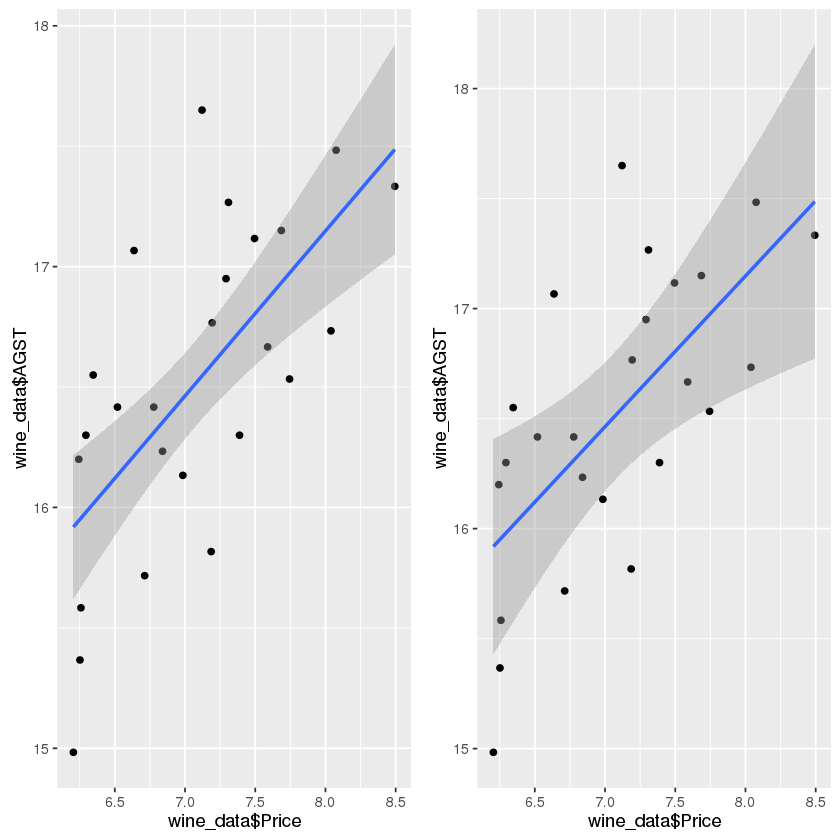

In [52]:
library(gridExtra)

grid.arrange(
    ggplot(wine_data, aes(x=wine_data$Price, y=wine_data$AGST)) +
    geom_point() +   
    geom_smooth(method=lm,level = 0.90),   # Add linear regression line, includes 90% confidence region
    
ggplot(wine_data, aes(x=wine_data$Price, y=wine_data$AGST)) +
    geom_point() +   
    geom_smooth(method=lm,level = 0.99),   # Add linear regression line, includes 99% confidence region
nrow=1,ncol=2)

In [53]:
#confint() computes confidence intervals for one or more parameters in the fitted model. 
#For 
confint(AGST_reg, level=0.95)

,2.5 %,97.5 %
(Intercept),-8.5759860,1.7404634
AGST,0.3229021,0.9472865


#### Influential Observations

A single observation can skew the results of a regression analysis, in other words can greatly influence the results. Therefore its important to keep an eye out for possible influential observations, take them into consideration when interpreting the results.

The influence of one particular observation can be understood in terms of how much the predicted scores for other observations would differ if the observation in question were not included. Cook's D is a measure which is proportional to the sum of the squared differences between predictions made with all observations in the analysis and predictions made leaving out the observation in question. If the predictions are the same with or without the observation in question, then the observation has no influence on the regression model. If the predictions differ greatly when the observation is not included in the analysis, then the observation is influential.

As a common rule of thumb an observation with a value of Cook's D over 1.0 has too much influence. Lets go ahead and plot our model to see if there are any influential observations.

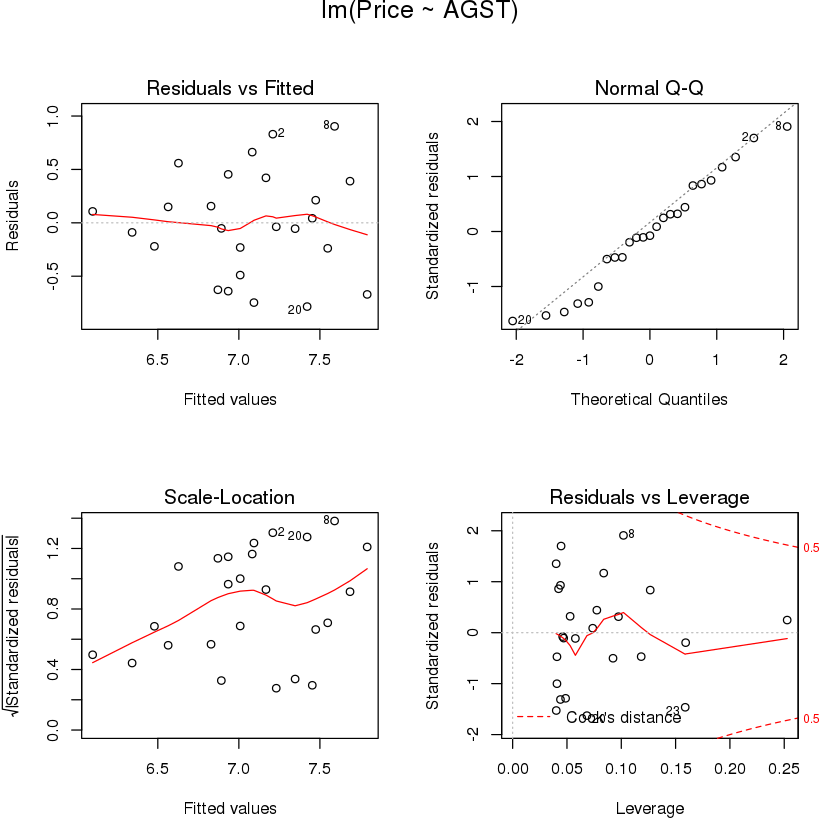

In [54]:
par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(AGST_reg)

Above plots suggest, observations 2,8 and 20 are possibly problematic to our model. We will peak into these observations to see what those rows contain.

In [55]:
wine_data[c(2, 8, 20),]

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
2,1953,8.0393,690,16.7333,80,30,43495.03
8,1961,8.4937,830,17.3333,38,22,47128.00
20,1973,6.6367,376,17.0667,123,10,53332.81


We can display the observations that have relatively large values of Cook's D. A conventional cut-off point is 4/n, where n is the number of observations in the data set. We will use this criterion to select the values to display.

In [56]:
# library(foreign)
# library(MASS)
# Calculate cook's D for all the rows/observations in our model.
cooks_dist <- cooks.distance(AGST_reg)

# cbind is a function used to combine data column wise. wine_data and cooks_dist both have same number of rows. If one of 
# the input parameters have less number of rows of data, then it repeats the values of the column with less values 
# so that all rows have data avoiding nulls.
influence_data <- cbind(wine_data,cooks_dist)

# selecting rows from influence_data where cook's D is greater than 4/number of rows in wine_data. 
influence_data[cooks_dist > 4/nrow(wine_data), ]

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop,cooks_dist
8,1961,8.4937,830,17.3333,38,22,47128.00,0.2069390
23,1976,7.1211,418,17.6500,247,7,54159.05,0.2024265


We identified two rows which are having cook's D greater than accepted limit. We can include these in the dataset or remove them after analyzing if they are really outliers or not.

### Multiple Regression

Multiple regression model is similar to one variable regression model but has a coefficient term for each independent variable `x`.  Mathematically it can be represented as $y^i = β_0 + β_1.{x_1}^i + β_2.{x_2}^i + ... + β_k.{x_k}^i +\epsilon^i$, i = 1, 2, . . . , n. 

We predict the dependent variable `y` using independent variables ${x_1}$, ${x_2}$, through ${x_k}$ and so on. `K` here represents the number of independent variables in the model. 

$β_0$ is the coefficient for intercept term and $β_1$ through $β_k$ are coefficients for independent variables. `i` is used to denote a particular observation in the dataset. The best model is selected same as the above. Minimize the Squared errors (**SSE**) using error terms $\epsilon^i$.   

----
Continue working with the wine price dataset to fit a multiple regression model for predicting wine price. Lets try to fit single variable regression models using each independent variable to predict wine price. Fitting simple linear regression models using all the independent variables gave $R^2$ values as listed below.


variable | $R^2$
---------|-------
Year     | 0.20 
WinterRain|0.02
AGST|0.44
HarvestRain|0.32
Age|0.20
FrancePop|0.22

Based on above table, we see that Average Growing Season Temparature (AGST) has an $R^2$ value of 0.44. We will build our multiple regression model using AGST and keep adding variables one ny one. 

In [57]:
multi_reg1 <- lm(Price ~ AGST, data=wineprice_data)
summary(multi_reg1)


Call:
lm(formula = Price ~ AGST, data = wineprice_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78450 -0.23882 -0.03727  0.38992  0.90318 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.4178     2.4935  -1.371 0.183710    
AGST          0.6351     0.1509   4.208 0.000335 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4993 on 23 degrees of freedom
Multiple R-squared:  0.435,	Adjusted R-squared:  0.4105 
F-statistic: 17.71 on 1 and 23 DF,  p-value: 0.000335


According to the table above, harvestRain is the one with next highest $R^2$ value. So include HarvestRain in our model. 

In [58]:
multi_reg2 <- lm(Price ~ AGST + HarvestRain, data=wineprice_data)
summary(multi_reg2)


Call:
lm(formula = Price ~ AGST + HarvestRain, data = wineprice_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88321 -0.19600  0.06178  0.15379  0.59722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.20265    1.85443  -1.188 0.247585    
AGST         0.60262    0.11128   5.415 1.94e-05 ***
HarvestRain -0.00457    0.00101  -4.525 0.000167 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3674 on 22 degrees of freedom
Multiple R-squared:  0.7074,	Adjusted R-squared:  0.6808 
F-statistic: 26.59 on 2 and 22 DF,  p-value: 1.347e-06


There is a significant increase in $R^2$ value implying after adding HarvestRain the model is able to explain 70% of variation in the data. Adjusted R-squared value has increased from 0.4105 to 0.6808. Keep an eye on Adjusted R-squared value as we will examine it closely soon. Add FrancePop as our third predictor of our new model.

In [59]:
multi_reg3 <- lm(Price ~ AGST + HarvestRain + FrancePop, data=wineprice_data)
summary(multi_reg3)


Call:
lm(formula = Price ~ AGST + HarvestRain + FrancePop, data = wineprice_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64352 -0.21716 -0.02674  0.28963  0.47593 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.709e+00  2.073e+00   0.824  0.41898    
AGST         5.273e-01  9.906e-02   5.323 2.80e-05 ***
HarvestRain -4.505e-03  8.690e-04  -5.184 3.89e-05 ***
FrancePop   -5.388e-05  1.823e-05  -2.956  0.00755 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3161 on 21 degrees of freedom
Multiple R-squared:  0.7933,	Adjusted R-squared:  0.7638 
F-statistic: 26.87 on 3 and 21 DF,  p-value: 2.203e-07


Again there is a good improvement in $R^2$ value from 0.70 to 0.79. FrancePop is able to explain variation in the data that AGST and HarvestRain couldn't. Adjusted R-squared value has increased from 0.6808 to 0.7638. Add Year as our fourth predictor of our new model.

In [60]:
multi_reg4 <- lm(Price ~ AGST + HarvestRain + FrancePop + Year, data=wineprice_data)
summary(multi_reg4)


Call:
lm(formula = Price ~ AGST + HarvestRain + FrancePop + Year, data = wineprice_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62758 -0.20490 -0.00805  0.25134  0.45770 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.521e+01  1.539e+02  -0.359    0.724    
AGST         5.235e-01  1.017e-01   5.149 4.89e-05 ***
HarvestRain -4.465e-03  8.938e-04  -4.996 6.94e-05 ***
FrancePop   -1.180e-04  1.742e-04  -0.677    0.506    
Year         3.060e-02  8.273e-02   0.370    0.715    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3228 on 20 degrees of freedom
Multiple R-squared:  0.7947,	Adjusted R-squared:  0.7537 
F-statistic: 19.36 on 4 and 20 DF,  p-value: 1.188e-06


There is barely any increase in the $R^2$ value from 0.7933 to 0.7947. Year did not contribute anything to the model. Adjusted R-squared value has decreased from 0.7638 to 0.7537. So when you keep adding predictors to the model that doesn't contribute much there is penalty on the model in the form of Adjusted R-squared. If you keep adding more variables there won't be a significant improvement in $R^2$ value but Adjusted R-squared value keeps decreasing which suggests there is no use in adding the variables to the model.